## Exploratory Data Analysis

In [1]:
#Download necessary libraries and format graphs.
install.packages("countrycode")

library(tidyverse)
library(GGally)
library(scales)
library(countrycode) #package that helps rename ISO codes.

options(repr.plot.width = 14, repr.plot.height = 10)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### Loading and Checking the Data

In [2]:
#Read data into R. Dataset was uploaded to a GitHub repo to allow it to be read from a URL.
ds_salaries <- read_csv("https://raw.githubusercontent.com/1zhoueri/stat-301-project/main/ds_salaries.csv")


New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Check the packaging.
str(ds_salaries)

spc_tbl_ [607 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:607] 0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num [1:607] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr [1:607] "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr [1:607] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:607] "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : num [1:607] 70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr [1:607] "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num [1:607] 79833 260000 109024 20000 150000 ...
 $ employee_residence: chr [1:607] "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : num [1:607] 0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr [1:607] "DE" "JP" "GB" "HN" ...
 $ company_size      : chr [1:607] "L" "S" "M" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  .

#### Table 1 and 2: Data Scientist Job Salaries Dataset

In [4]:
#Show the top and bottom of the data.
head(ds_salaries)
tail(ds_salaries)

...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
#Check the dimensions of the data.
dim(ds_salaries)

[1] 607  12

In [6]:
#View summary statistics and the number of unique values in the dataset.
summary(ds_salaries, maxsum = 30)
sapply(ds_salaries, function(x) n_distinct(x))


      ...1         work_year    experience_level   employment_type   
 Min.   :  0.0   Min.   :2020   Length:607         Length:607        
 1st Qu.:151.5   1st Qu.:2021   Class :character   Class :character  
 Median :303.0   Median :2022   Mode  :character   Mode  :character  
 Mean   :303.0   Mean   :2021                                        
 3rd Qu.:454.5   3rd Qu.:2022                                        
 Max.   :606.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

...1          work_year   experience_level    employment_type 
               607                  3                  4                  4 
         job_title             salary    salary_currency      salary_in_usd 
                50                272                 17                369 
employee_residence       remote_ratio   company_location       company_size 
                57                  3                 50                  3

Some changes need to be made to the data at first glance. The first column is unnecessary as it only contains row numbers (not a variable) and the character columns should be factors in order to use them as categorical variables.

### Cleaning and Tidying Data

In [7]:
#Remove the first column from the data and turn catagorical variables into factors.
tidy_ds_salaries <- ds_salaries[, -1] |>
    mutate(across(-c(salary, salary_in_usd), as.factor))

In [8]:
#View summary statistics about the dataset.
summary(tidy_ds_salaries, maxsum = 60)

 work_year  experience_level employment_type
 2020: 72   EN: 88           CT:  5         
 2021:217   EX: 26           FL:  4         
 2022:318   MI:213           FT:588         
            SE:280           PT: 10         
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
                                            
          

Based on the new summary output, we can now see what groups of observations exist in the data. Since `employee_residence`, `company_location`, and `job_title` have many different groups, we will simplify them by merging the different countries in  `employee_residence` and `company_location` into 7 regions (defined in the World Bank Development Indicators) and by merging the jobs in `job_title` into 3 groups: Data Scientist, Data Analyst, and Data Engineer. 
- Data Scientist will be more general and includes jobs that mention scientist, researcher, consultant, or heads of data science departments (excluding ones that mention engineer).
- Data Analyst will include jobs that mention analytics and analyst (excluding ones that mention engineer).
- Data Engineer will include jobs that mention engineer, engineering, architect, and developer.


In [9]:
#Merge countries in `employee_residence` and `company_location` into 7 regions.
tidy_ds_salaries$company_location <- as.factor(countrycode(tidy_ds_salaries$company_location, "iso2c", "region"))
tidy_ds_salaries$employee_residence <- as.factor(countrycode(tidy_ds_salaries$employee_residence, "iso2c", "region"))

In [10]:
#Rename each job in `job_title`.
data_scientist_job_titles <- c(
    "Data Scientist", "3D Computer Vision Researcher", "Machine Learning Scientist",
    "AI Scientist", "Applied Data Scientist", "Applied Machine Learning Scientist",
    "Data Science Consultant", "Data Science Manager", "Data Specialist",
    "Director of Data Science", "Head of Data", "Head of Data Science",
    "Head of Machine Learning", "Lead Data Scientist", "Machine Learning Manager",
    "Principal Data Scientist", "Research Scientist", "Staff Data Scientist"
)
data_analyst_job_titles <- c(
    "BI Data Analyst", "Business Data Analyst", "Data Analyst",
    "Data Analytics Lead", "Data Analytics Manager", "Finance Data Analyst",
    "Financial Data Analyst", "Lead Data Analyst", "Marketing Data Analyst",
    "Product Data Analyst", "Principal Data Analyst"
)
data_engineer_job_titles <- c(
    "Analytics Engineer", "Data Engineer", "Big Data Architect",
    "Data Engineer", "Big Data Engineer", "Data Engineer",
    "Cloud Data Engineer", "Data Engineer", "Computer Vision Engineer",
    "Data Engineer", "Computer Vision Software Engineer",
    "Data Engineer", "Data Analytics Engineer", "Data Engineer",
    "Data Architect", "Data Engineer", "Data Engineering Manager",
    "Data Science Engineer", "Director of Data Engineering", "ETL Developer",
    "Lead Data Engineer", "Lead Machine Learning Engineer", "Machine Learning Developer",
    "Machine Learning Engineer", "Machine Learning Infrastructure Engineer", "ML Engineer",
    "NLP Engineer", "Principal Data Engineer"
)

tidy_ds_salaries$job_title <- factor(
    tidy_ds_salaries$job_title,
    levels = c(data_scientist_job_titles, data_analyst_job_titles, data_engineer_job_titles),
    labels = c(rep("Data Scientist", length(data_scientist_job_titles)),
               rep("Data Analyst", length(data_analyst_job_titles)), 
               rep("Data Engineer", length(data_engineer_job_titles)))
)

#Resets the factors in `job_title` to only include the three catagories.
tidy_ds_salaries <- mutate(tidy_ds_salaries, job_title = as.character(job_title)) |>
    mutate(job_title = as.factor(job_title))

summary(tidy_ds_salaries, maxsum = 60)

 work_year  experience_level employment_type          job_title  
 2020: 72   EN: 88           CT:  5          Data Analyst  :127  
 2021:217   EX: 26           FL:  4          Data Engineer :247  
 2022:318   MI:213           FT:588          Data Scientist:233  
            SE:280           PT: 10                              
                                                                 
                                                                 
                                                                 
                                                                 
                                                                 
                                                                 
                                                                 
                                                                 
                                                                 
                                                                 
          

#### Table 3: Tidy Data Scientist Job Salaries Dataset

In [11]:
head(tidy_ds_salaries)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
2020,MI,FT,Data Scientist,70000,EUR,79833,Europe & Central Asia,0,Europe & Central Asia,L
2020,SE,FT,Data Scientist,260000,USD,260000,East Asia & Pacific,0,East Asia & Pacific,S
2020,SE,FT,Data Engineer,85000,GBP,109024,Europe & Central Asia,50,Europe & Central Asia,M
2020,MI,FT,Data Analyst,20000,USD,20000,Latin America & Caribbean,0,Latin America & Caribbean,S
2020,SE,FT,Data Engineer,150000,USD,150000,North America,50,North America,L
2020,EN,FT,Data Analyst,72000,USD,72000,North America,100,North America,L


### Data Visualization

The visualizations we will use to explore the data will be boxplots. Visualizations for the variables `salary` and `salary_currency` are not included due to their exclusion from the analysis for the reasons that will be discussed in the **Methods and Plan**.

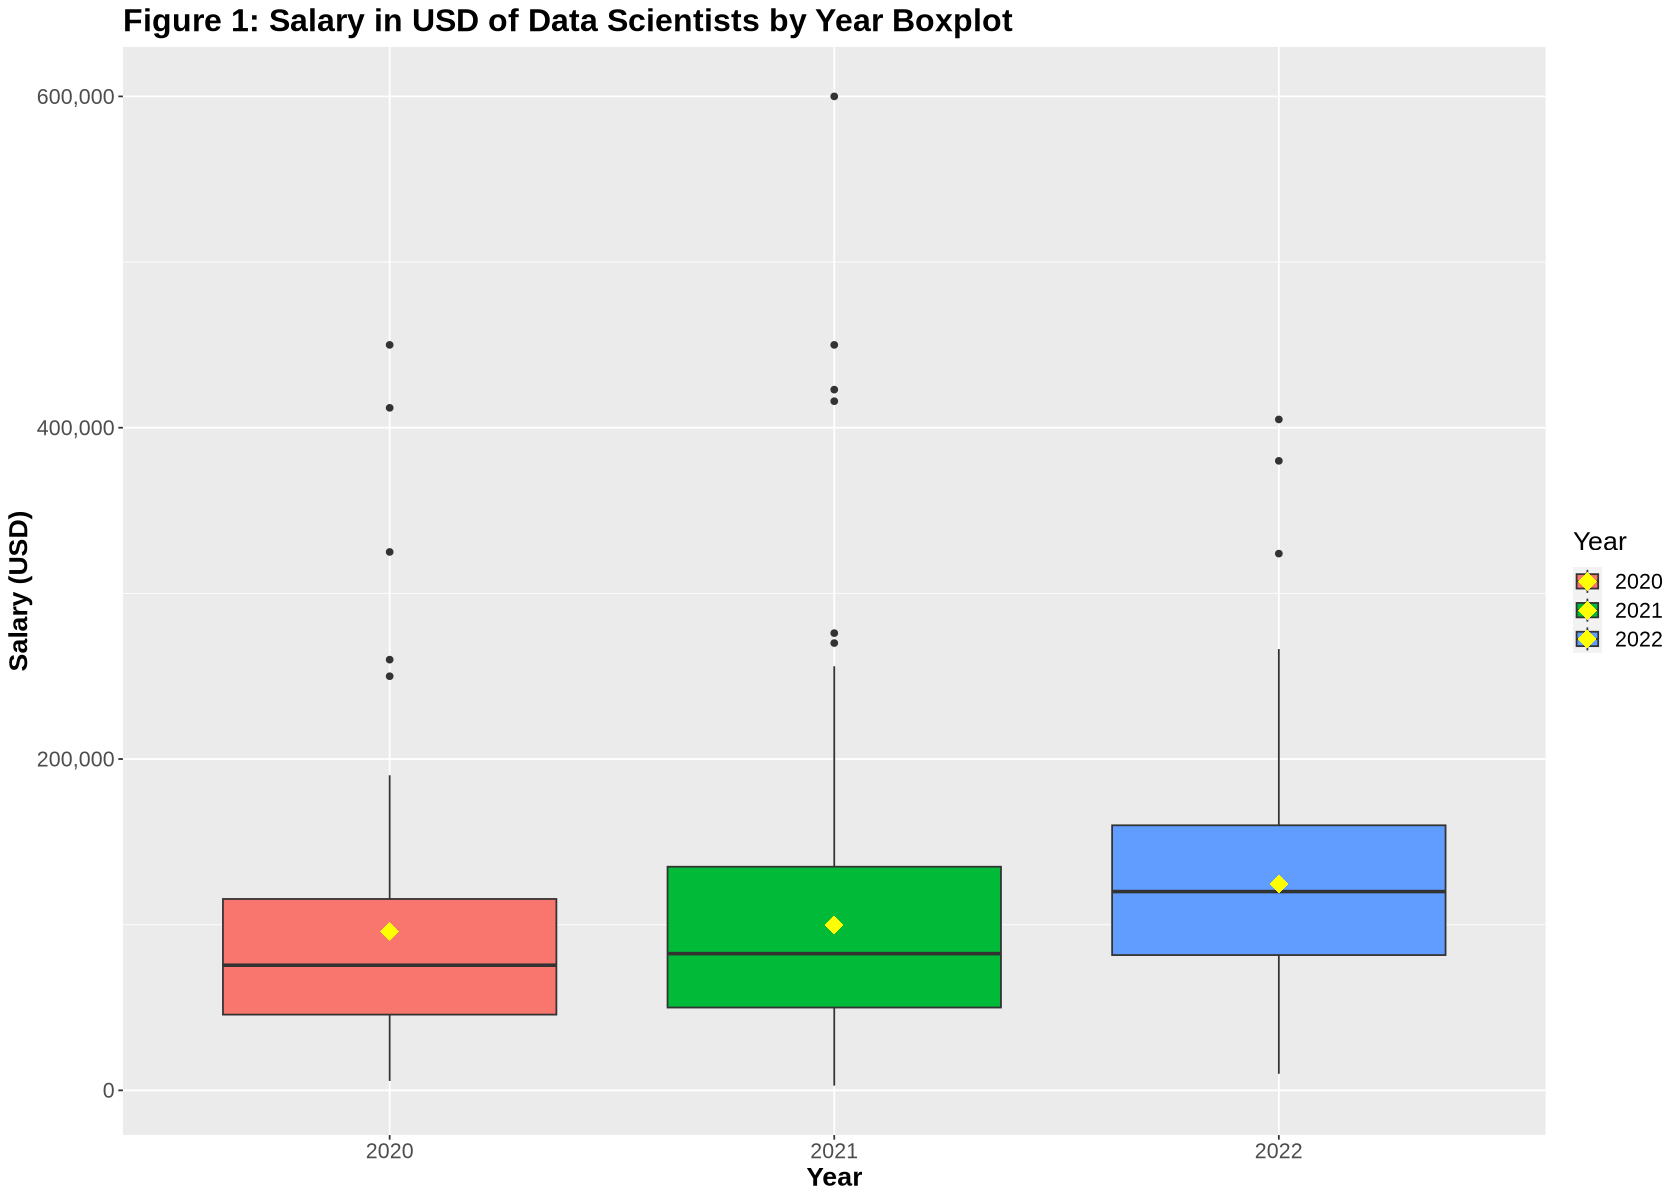

In [12]:
#Boxplot for salary in USD and year. A point is added indicating the mean.
salary_in_usd_work_year_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    labs(x = "Year",
         y = "Salary (USD)",
         title = "Figure 1: Salary in USD of Data Scientists by Year Boxplot",
         fill = "Year") +
    stat_summary(aes(x = work_year, y = salary_in_usd, fill = work_year),
        fun = "mean", 
        colour = "yellow", 
        geom = "point", 
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_work_year_boxplots

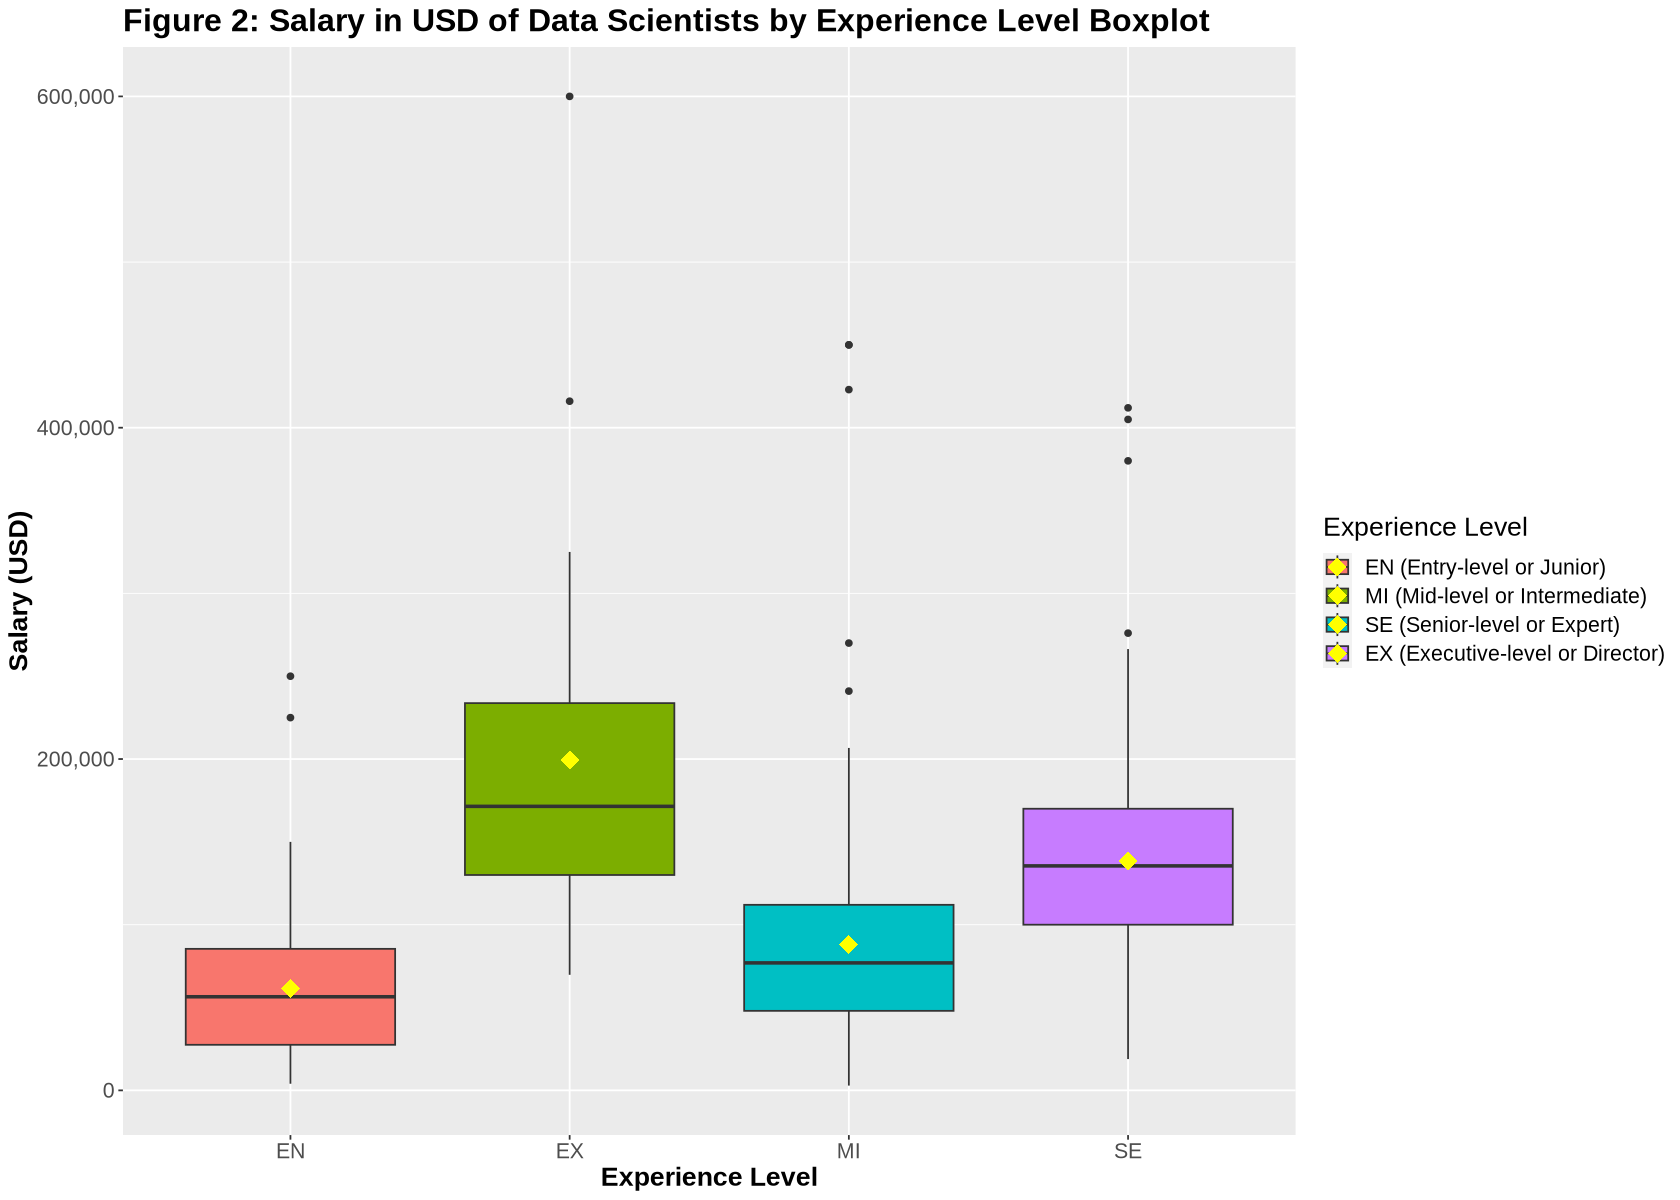

In [13]:
#Boxplot for salary in USD and experience level. A point is added indicating the mean.
salary_in_usd_experience_level_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = experience_level, y = salary_in_usd, fill = experience_level)) +
    labs(x = "Experience Level",
         y = "Salary (USD)",
         title = "Figure 2: Salary in USD of Data Scientists by Experience Level Boxplot",
         fill = "Experience Level") +
    stat_summary(aes(x = experience_level, y = salary_in_usd, fill = experience_level),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EN (Entry-level or Junior)",
                              "MI (Mid-level or Intermediate)",
                              "SE (Senior-level or Expert)",
                              "EX (Executive-level or Director)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_experience_level_boxplots

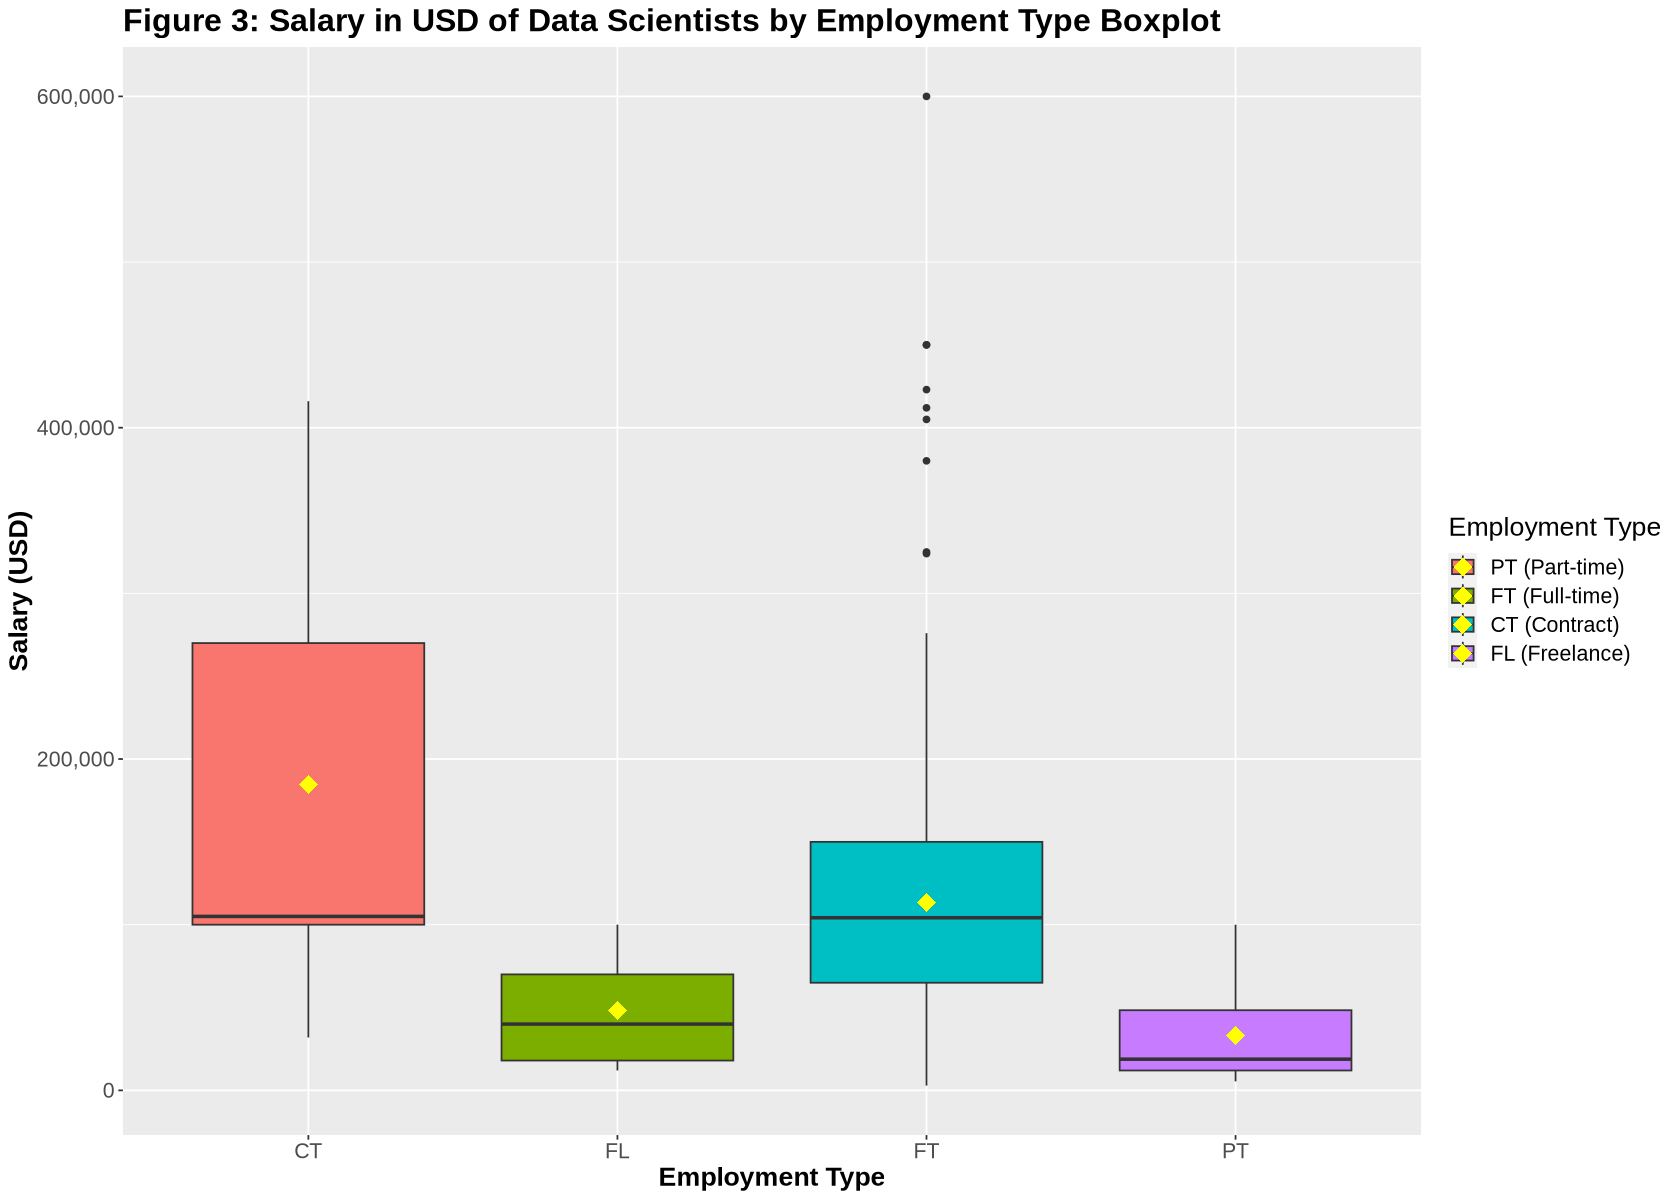

In [14]:
#Boxplot for salary in USD and employment type. A point is added indicating the mean.
salary_in_usd_employment_type_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = employment_type, y = salary_in_usd, fill = employment_type)) +
    labs(x = "Employment Type",
         y = "Salary (USD)",
         title = "Figure 3: Salary in USD of Data Scientists by Employment Type Boxplot",
         fill = "Employment Type") +
    stat_summary(aes(x = employment_type, y = salary_in_usd, fill = employment_type),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("PT (Part-time)",
                              "FT (Full-time)",
                              "CT (Contract)",
                              "FL (Freelance)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employment_type_boxplots

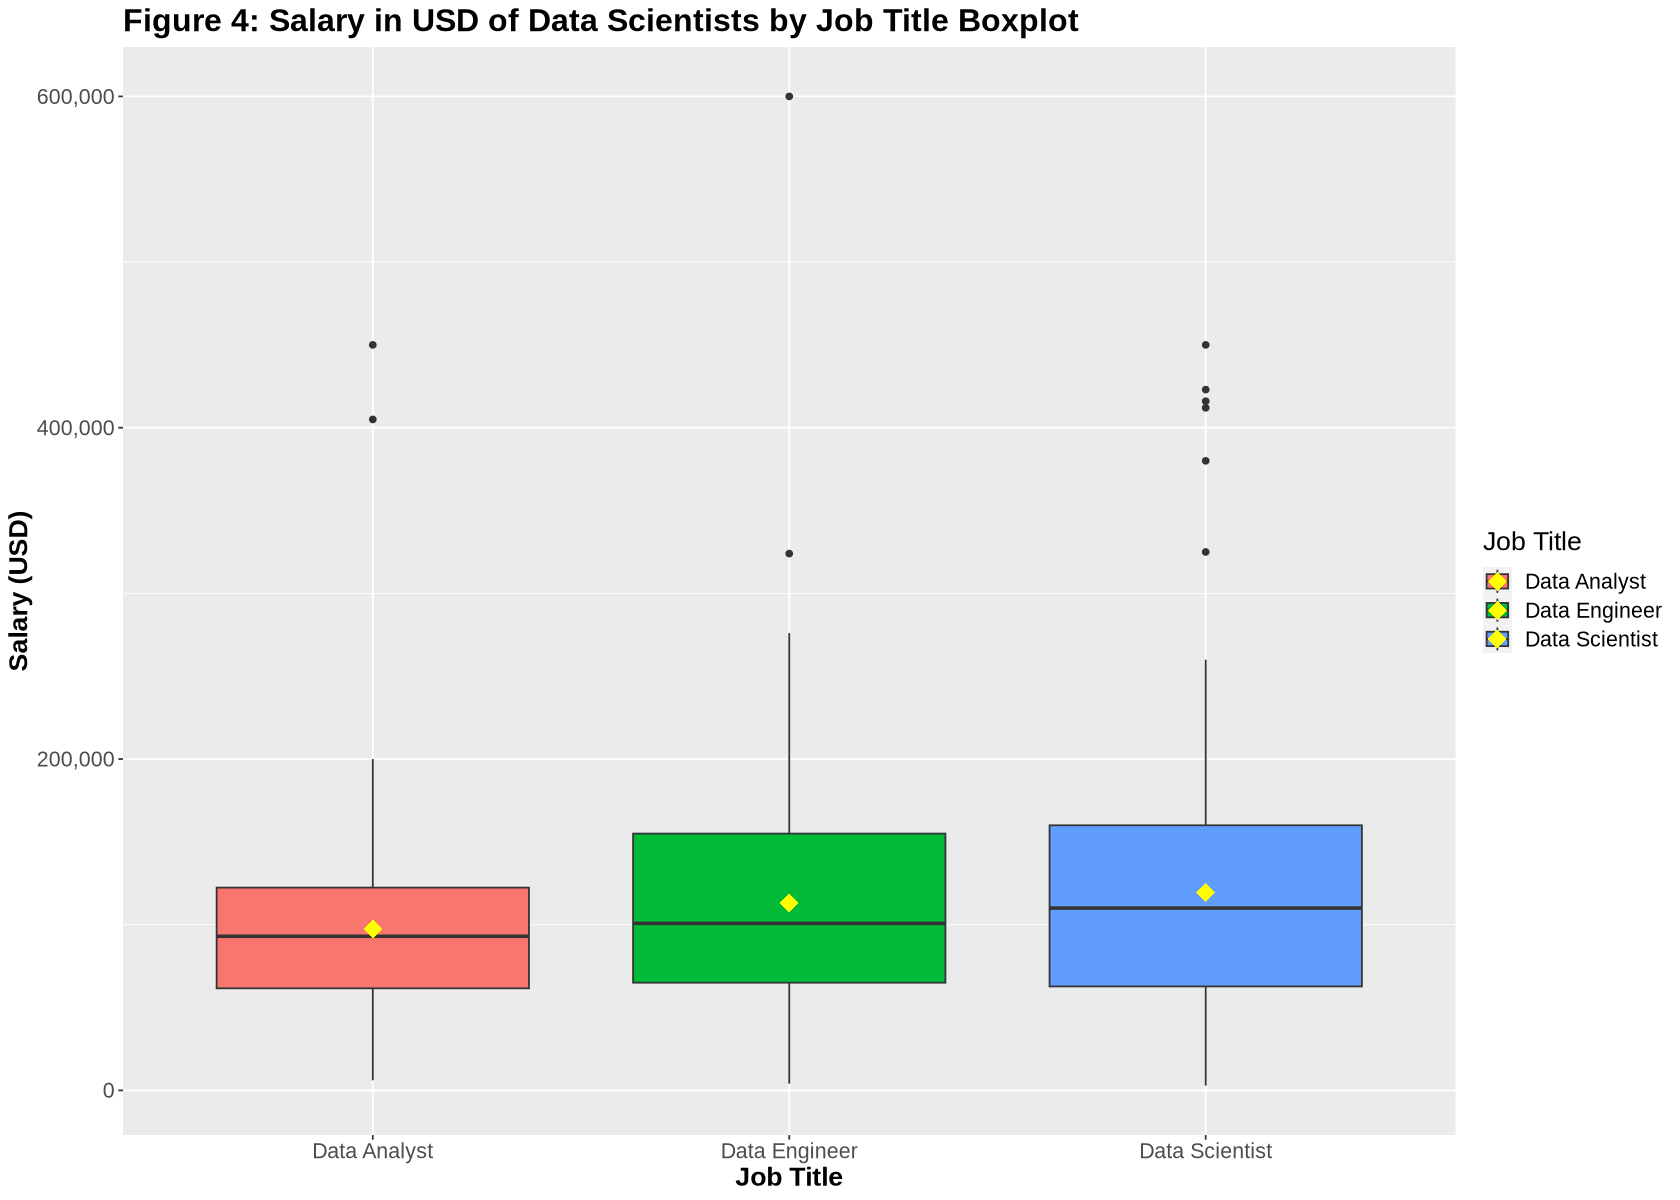

In [15]:
#Boxplot for salary in USD and job title. A point is added indicating the mean.
salary_in_usd_job_title_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = job_title, y = salary_in_usd, fill = job_title)) +
    labs(x = "Job Title",
         y = "Salary (USD)",
         title = "Figure 4: Salary in USD of Data Scientists by Job Title Boxplot",
         fill = "Job Title") +
    stat_summary(aes(x = job_title, y = salary_in_usd, fill = job_title),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_job_title_boxplots

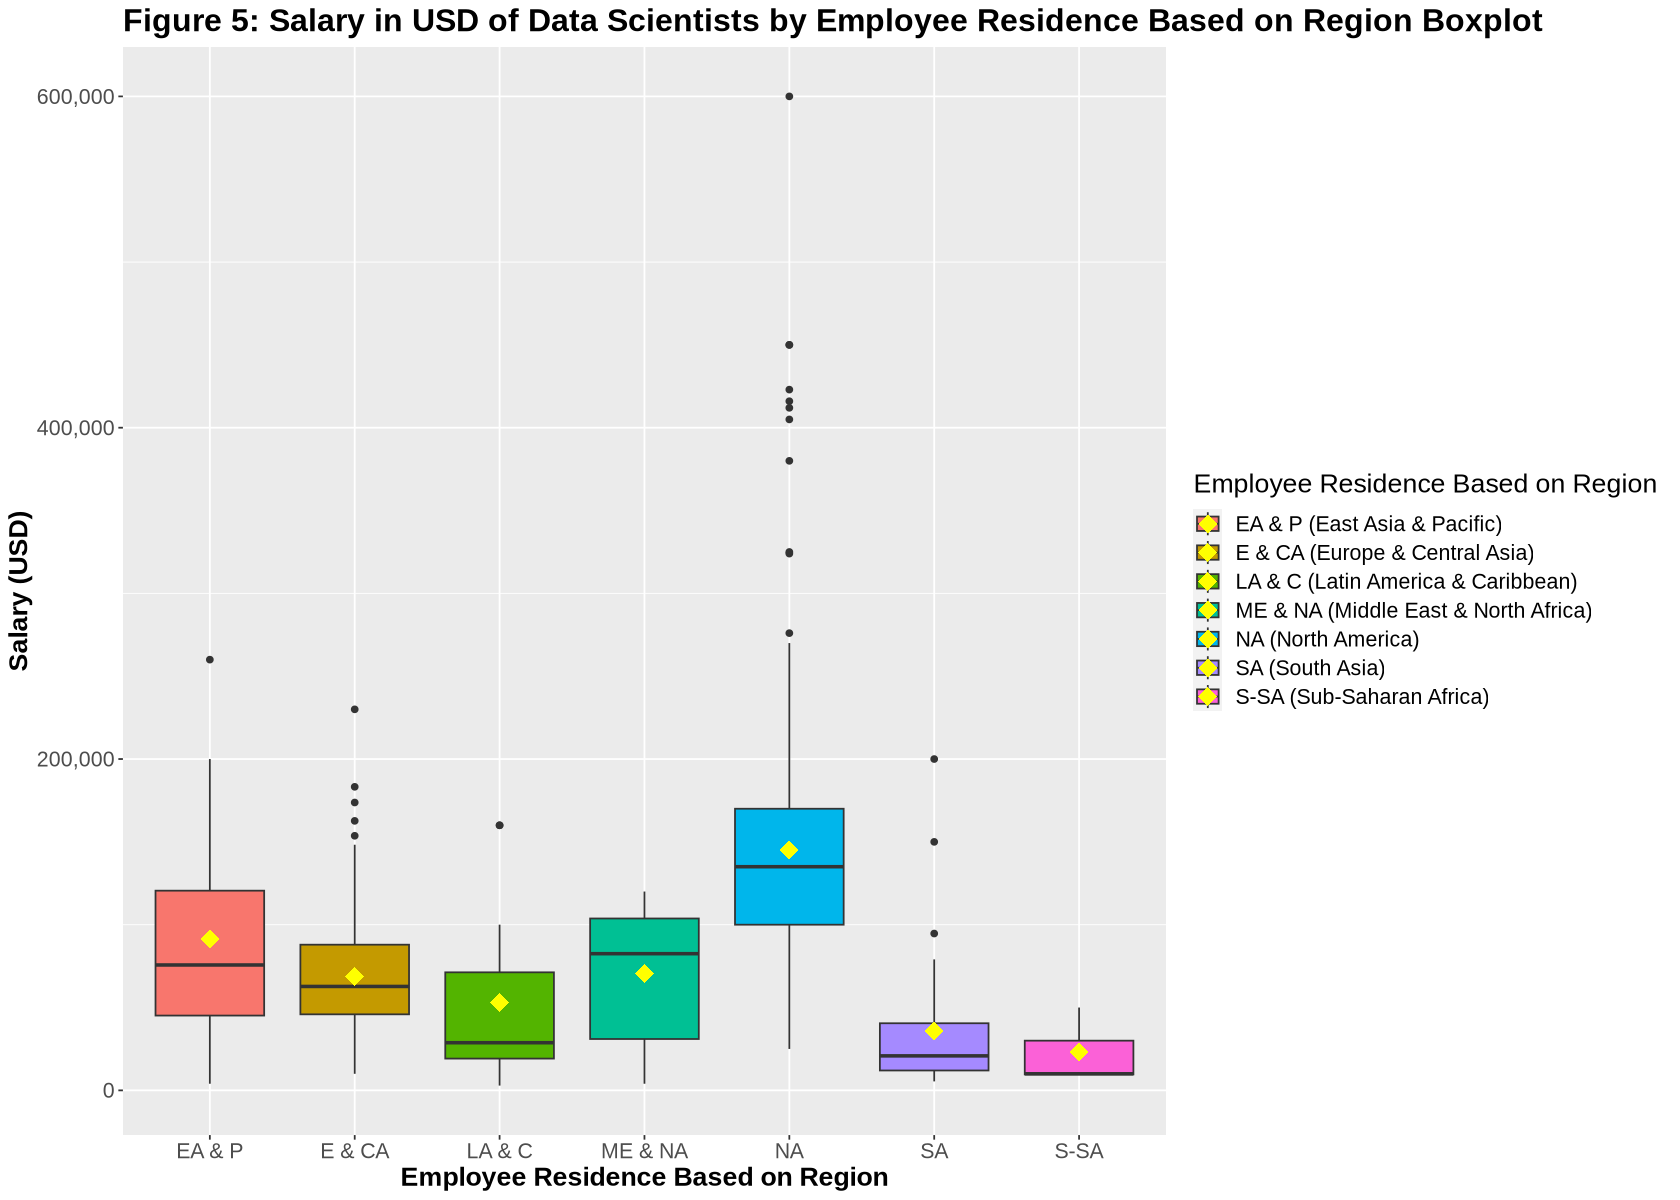

In [16]:
#Boxplot for salary in USD and employee residence. A point is added indicating the mean.
salary_in_usd_employee_residence_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence)) +
    labs(x = "Employee Residence Based on Region",
         y = "Salary (USD)",
         title = "Figure 5: Salary in USD of Data Scientists by Employee Residence Based on Region Boxplot",
         fill = "Employee Residence Based on Region") +
    stat_summary(aes(x = employee_residence, y = salary_in_usd, fill = employee_residence),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_employee_residence_boxplots

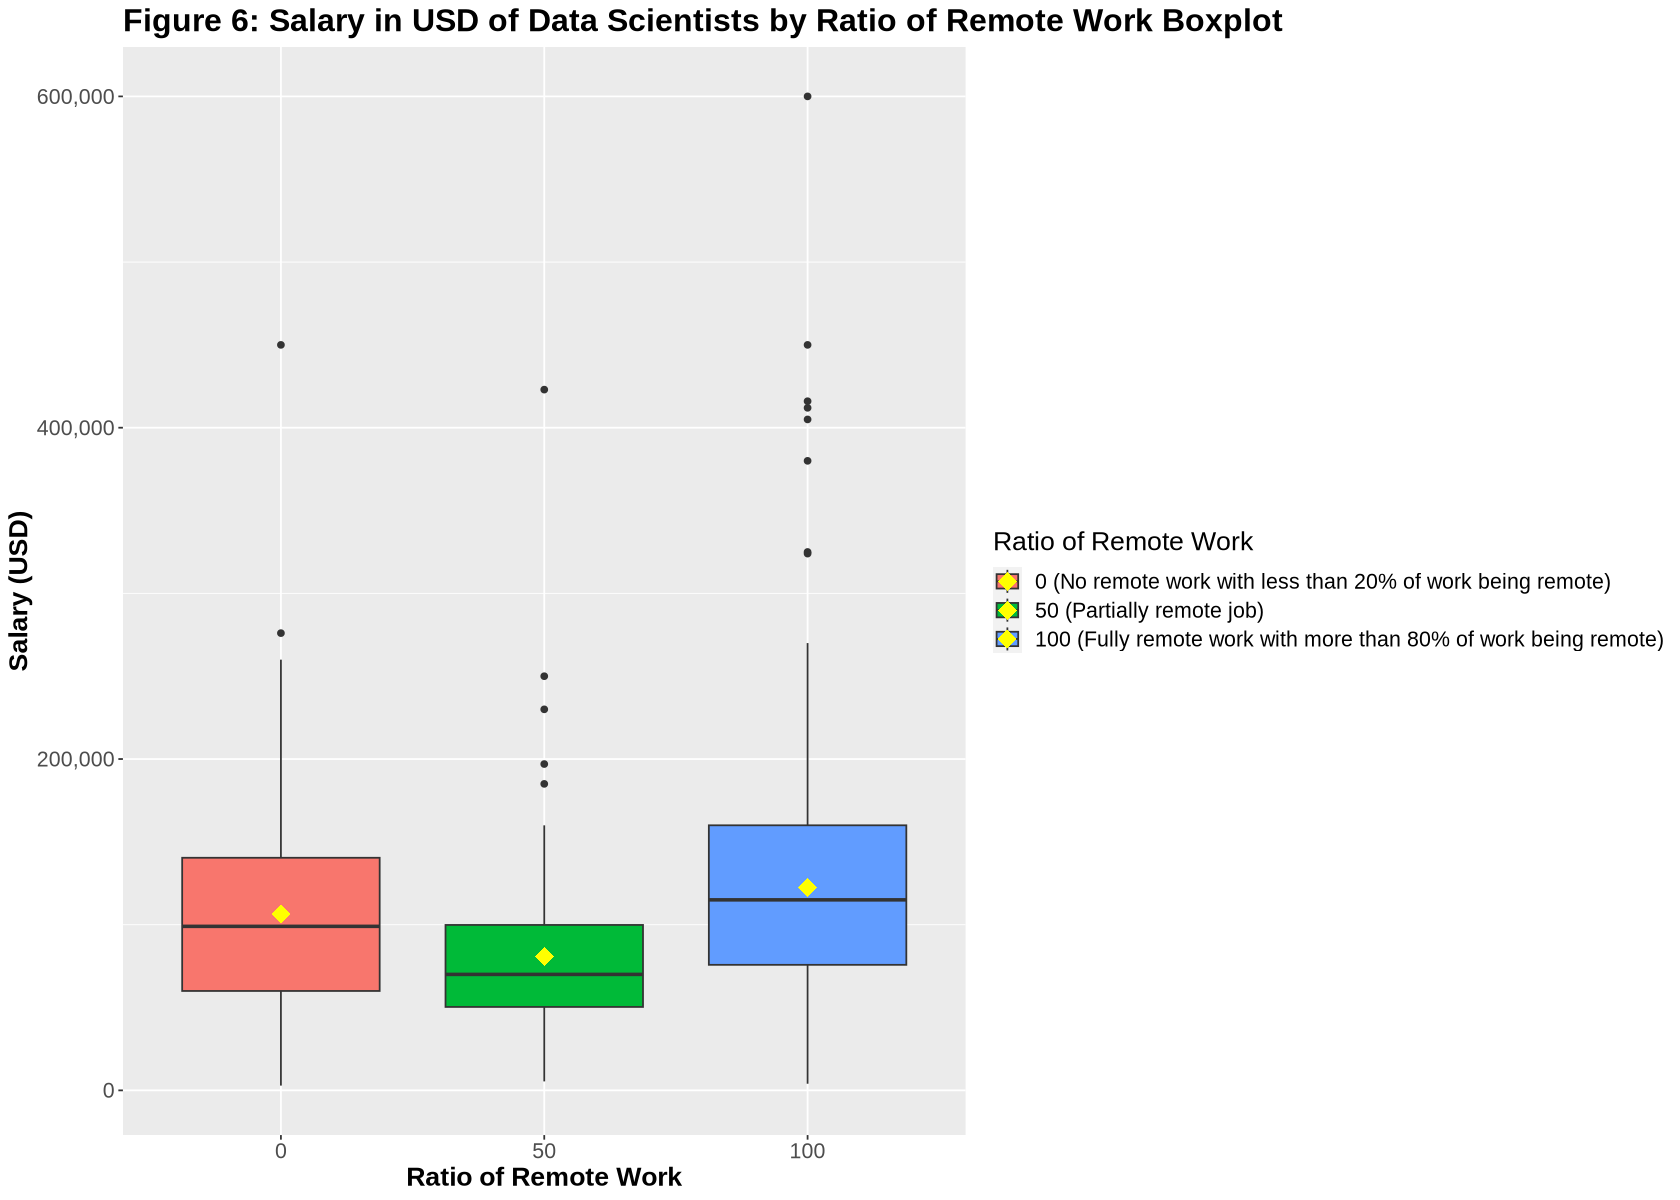

In [17]:
#Boxplot for salary in USD and the ratio of remote work. A point is added indicating the mean.
salary_in_usd_remote_ratio_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio)) +
    labs(x = "Ratio of Remote Work",
         y = "Salary (USD)",
         title = "Figure 6: Salary in USD of Data Scientists by Ratio of Remote Work Boxplot",
         fill = "Ratio of Remote Work") +
    stat_summary(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("0 (No remote work with less than 20% of work being remote)",
                              "50 (Partially remote job)",
                              "100 (Fully remote work with more than 80% of work being remote)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_usd_remote_ratio_boxplots

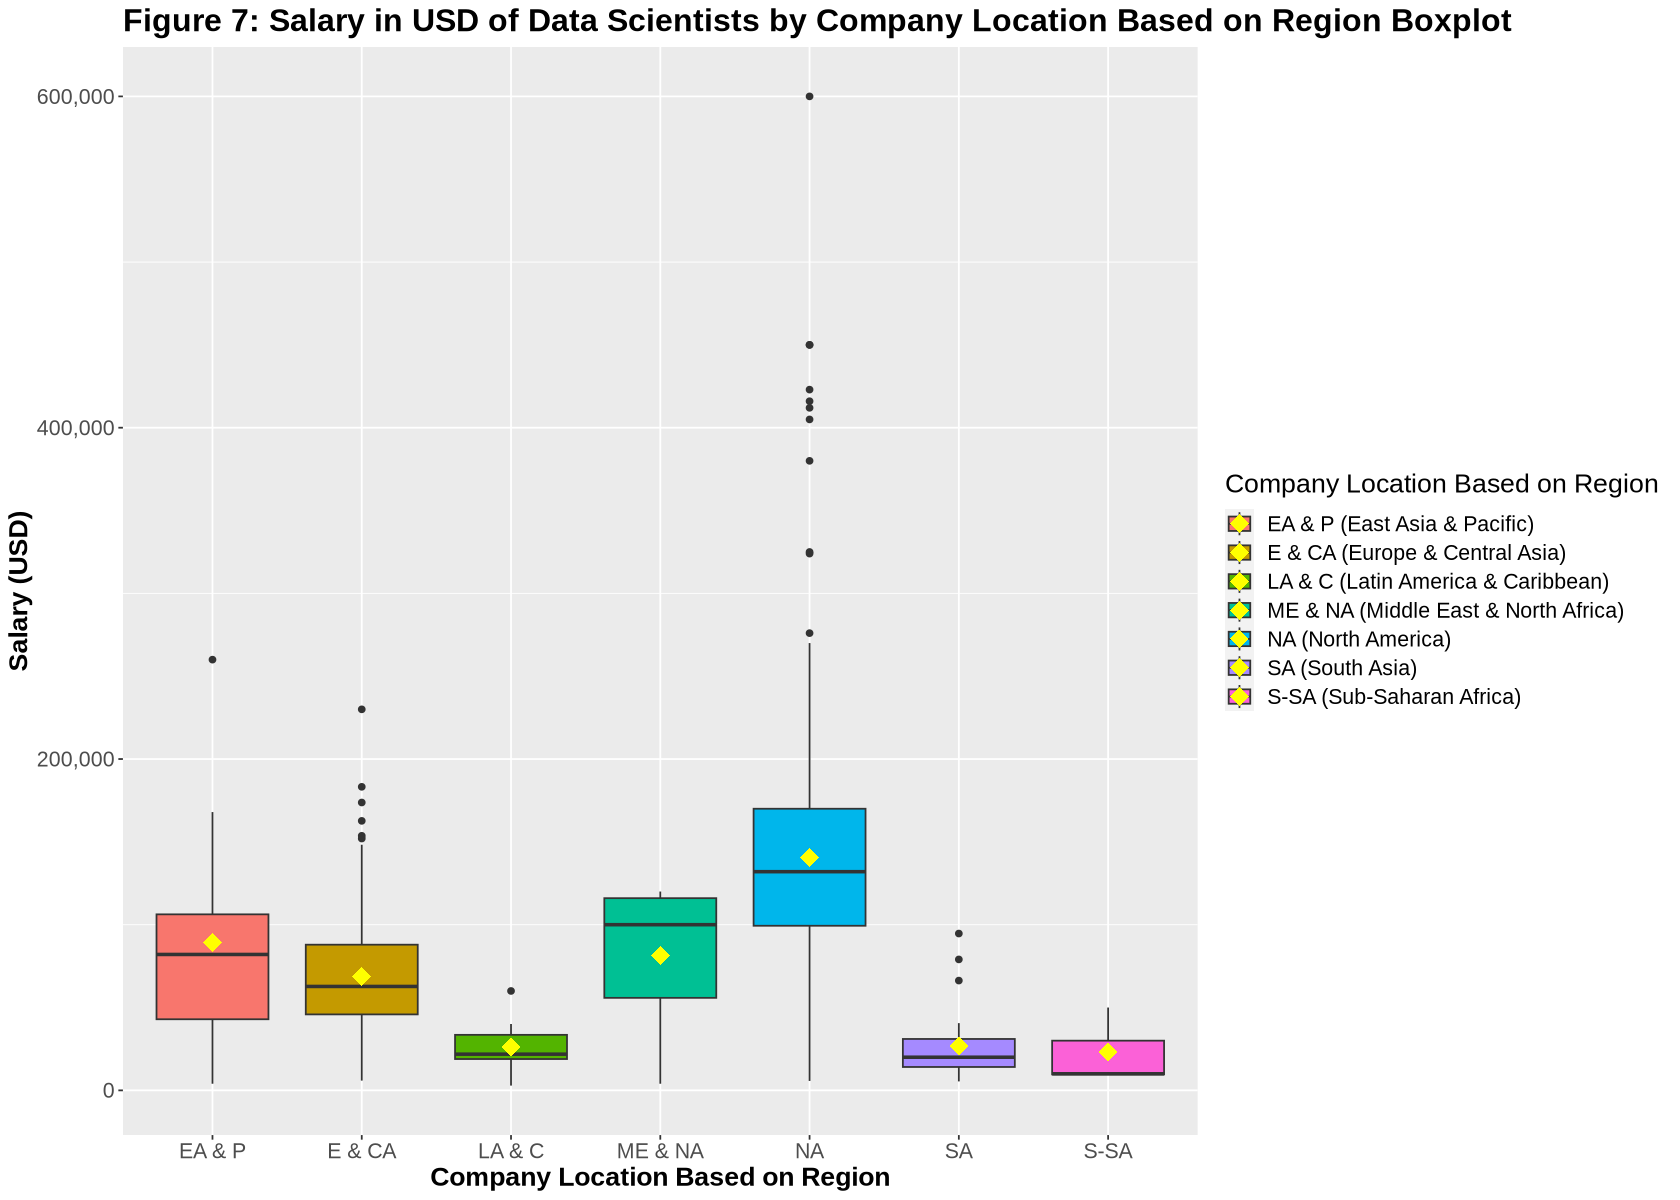

In [18]:
#Boxplot for salary in USD and company location. A point is added indicating the mean.
salary_in_usd_company_location_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = company_location, y = salary_in_usd, fill = company_location)) +
    labs(x = "Company Location Based on Region",
         y = "Salary (USD)",
         title = "Figure 7: Salary in USD of Data Scientists by Company Location Based on Region Boxplot",
         fill = "Company Location Based on Region") +
    stat_summary(aes(x = company_location, y = salary_in_usd, fill = company_location),
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_x_discrete(labels = c("EA & P", 
                                  "E & CA", 
                                  "LA & C", 
                                  "ME & NA", 
                                  "NA", 
                                  "SA", 
                                  "S-SA")) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("EA & P (East Asia & Pacific)", 
                              "E & CA (Europe & Central Asia)", 
                              "LA & C (Latin America & Caribbean)", 
                              "ME & NA (Middle East & North Africa)", 
                              "NA (North America)", 
                              "SA (South Asia)", 
                              "S-SA (Sub-Saharan Africa)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

  

salary_in_usd_company_location_boxplots

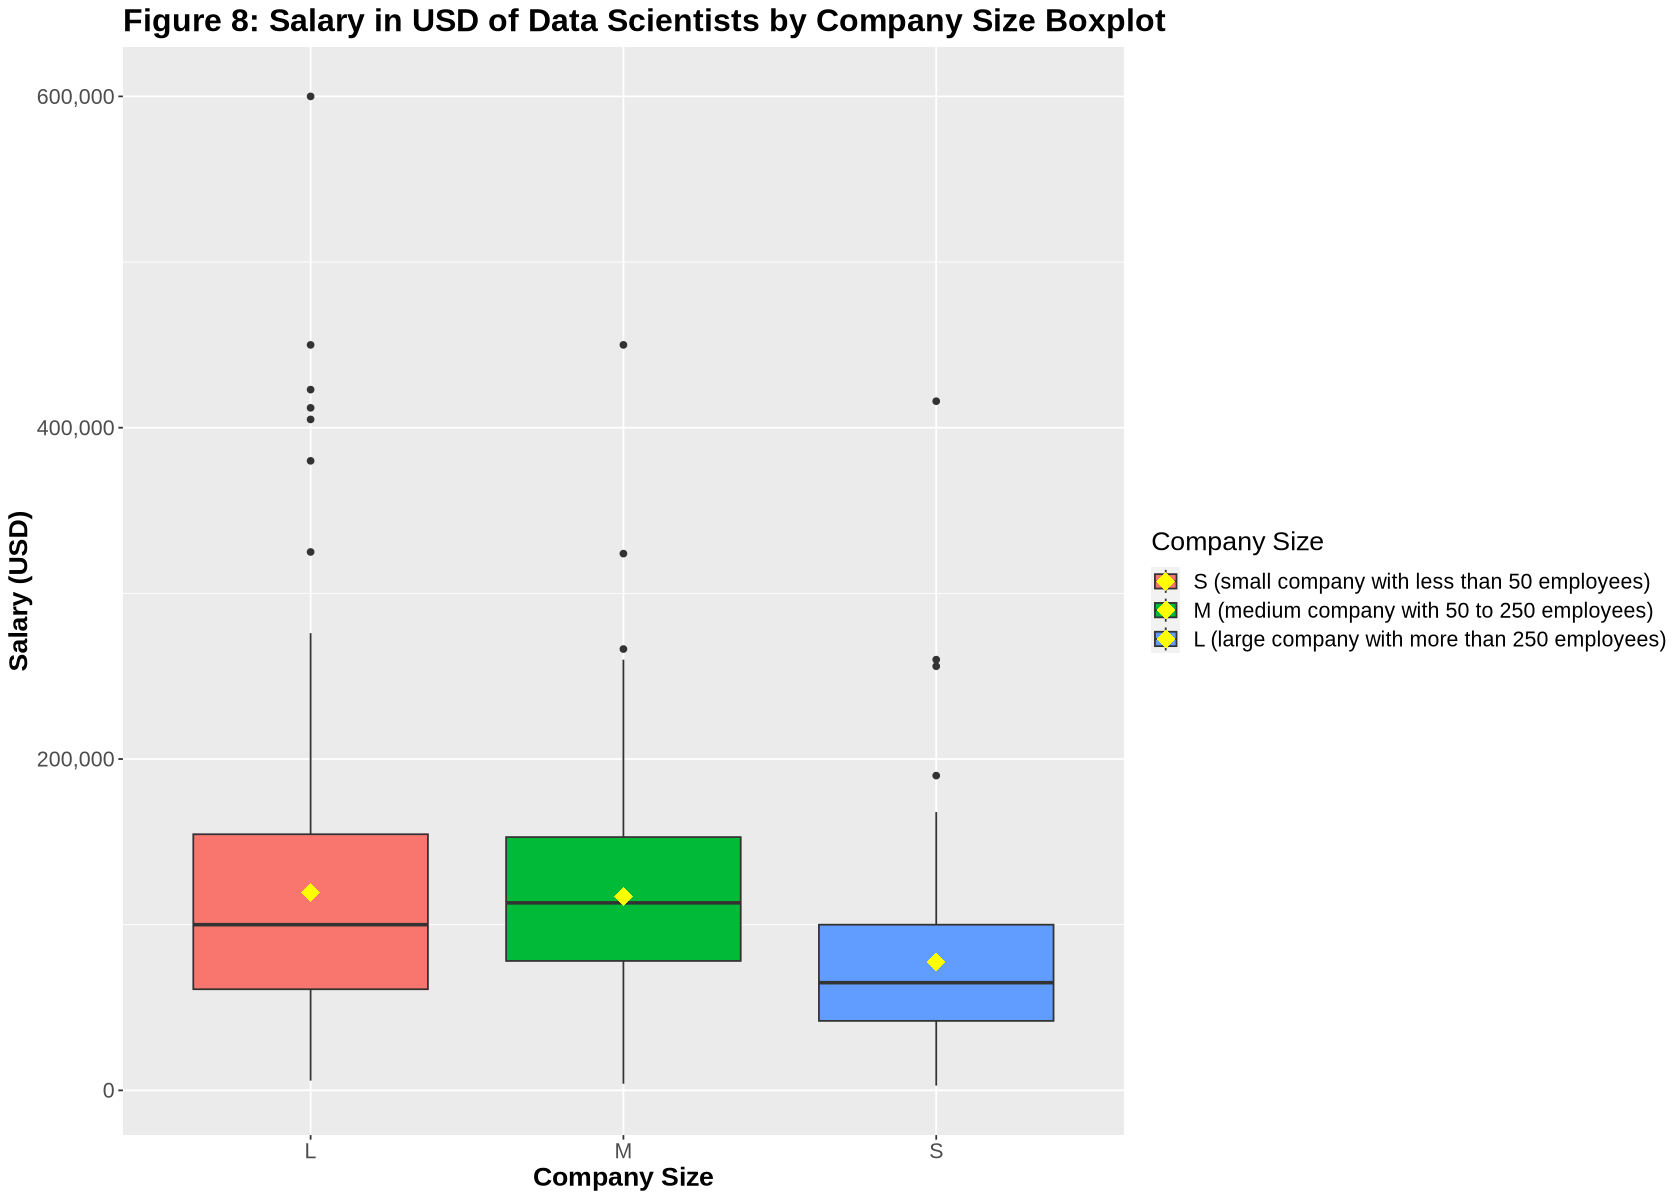

In [19]:
#Boxplot for salary in USD and company size. A point is added indicating the mean.
salary_in_company_size_boxplots <- tidy_ds_salaries |>
    ggplot() +
    geom_boxplot(aes(x = company_size, y = salary_in_usd, fill = company_size)) +
    labs(x = "Company Size",
         y = "Salary (USD)",
         title = "Figure 8: Salary in USD of Data Scientists by Company Size Boxplot",
         fill = "Company Size") +
    stat_summary(aes(x = company_size, y = salary_in_usd, fill = company_size), 
        fun = "mean", 
        colour = "yellow", 
        geom = "point",
        shape = 18, 
        size = 5) +
    scale_y_continuous(labels = label_comma()) +
    scale_fill_hue(labels = c("S (small company with less than 50 employees)",
                              "M (medium company with 50 to 250 employees)",
                              "L (large company with more than 250 employees)")) +
    theme(text = element_text(size = 16),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold", size = 16))

salary_in_company_size_boxplots